In [1]:
import requests
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.support.ui import Select

In [2]:
data = pd.read_csv('C:/Users/HEESU/[opgg데이터분석가]/BIPA_data.csv',index_col = 0)
champStat = pd.read_csv('C:/Users/HEESU/[opgg데이터분석가]/champ_stats.csv',index_col=0)

In [3]:
# data = data[data['result'] != 'UNKNOWN']

In [4]:
tierPoint = {'I':0 , 'B':400, 'S':800, 'G':1200, 'P':1600, 'D':2000, 'M':2400, 'R':2800, 'C':3200}
inv_tierPoint = {0:'I',  1:'B', 2:'S', 3:'G', 4:'P', 5:'D', 6:'M', 7:'R', 8:'C'}

In [5]:
def get_meanTier(gameId):
    
    summonerRank = data[data['gameId']==gameId]['tierRank']
    cnt = 0
    pointSum = 0
    
    for tier in summonerRank:
        try:
            pointSum += tierPoint[tier[0]]
            pointSum += (4-int(tier[1]))*100
            cnt += 1
        except:
            pass
    
    if cnt == 0:
        return "0000"
        
    pointSum /= cnt
    tier = inv_tierPoint[int(pointSum/400)]
    division = math.ceil((400-pointSum%400)/100)
    temp = tier + str(division)

    return temp

In [6]:
nanTierList_idx = data[data['tierRank'].isnull()].index

In [7]:
for idx in nanTierList_idx:
    data.at[idx, 'tierRank'] = get_meanTier(data.iloc[idx]['gameId'])

In [8]:
data['tier'] = data['tierRank'].str[0]
data['division'] = data['tierRank'].str[1]
data = data.drop(['tierRank'], axis=1)
data.head(3)

,gameId,createDate,position,teamId,summonerId,championId,result,level,championsKilled,numDeaths,...,neutralMinionsKilledTeamJungle,visionScore,damageSelfMitigated,damageDealtToObjectives,damageDealtToTurrets,lane,gameLength,version,tier,division
0,5383880006,2021-08-11 06:59:31,S,200,3210877,99,WIN,10,4,1,...,0,11,2830,2181,2181,NONE,972,11.16.390.1945,P,3
1,5383880006,2021-08-11 06:59:31,S,100,7550211,35,LOSE,8,1,3,...,2,24,2013,0,0,NONE,972,11.16.390.1945,P,4
2,5383880006,2021-08-11 06:59:31,M,200,9306696,266,WIN,11,5,1,...,0,15,6158,585,585,NONE,972,11.16.390.1945,P,3


In [9]:
data = data[['tier', 'division', 'position', 'level', 'minionsKilled', 'championsKilled', 'numDeaths', 'assists', 'wardPlaced', 'visionWardsBoughtInGame', 'wardKilled', 'goldEarned', 'totalDamageDealtToChampions', 'gameLength']]

In [10]:
nanidx = data[data['tier']=='0'].index
data = data.drop(nanidx)

In [11]:
################################################################

In [12]:
data.head(3)

,tier,division,position,level,minionsKilled,championsKilled,numDeaths,assists,wardPlaced,visionWardsBoughtInGame,wardKilled,goldEarned,totalDamageDealtToChampions,gameLength
0,P,3,S,10,15,4,1,5,5,1,1,6083,5590,972
1,P,4,S,8,7,1,3,3,6,3,3,4118,3827,972
2,P,3,M,11,100,5,1,5,7,4,5,6769,9467,972


In [13]:
data = data[data['gameLength'] >= 600]

In [14]:
data

,tier,division,position,level,minionsKilled,championsKilled,numDeaths,assists,wardPlaced,visionWardsBoughtInGame,wardKilled,goldEarned,totalDamageDealtToChampions,gameLength
0,P,3,S,10,15,4,1,5,5,1,1,6083,5590,972
1,P,4,S,8,7,1,3,3,6,3,3,4118,3827,972
2,P,3,M,11,100,5,1,5,7,4,5,6769,9467,972
3,P,4,T,11,115,8,2,1,5,1,0,7972,10963,972
4,P,3,A,10,110,3,2,9,5,1,2,7552,6465,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,S,1,S,15,29,1,11,7,29,4,7,8451,10019,2379
999996,G,4,M,18,251,10,6,3,8,0,1,18291,37581,2379
999997,G,4,J,17,40,5,5,22,13,3,2,12986,20994,2379
999998,S,1,A,17,260,6,5,3,11,1,4,15674,37078,2379


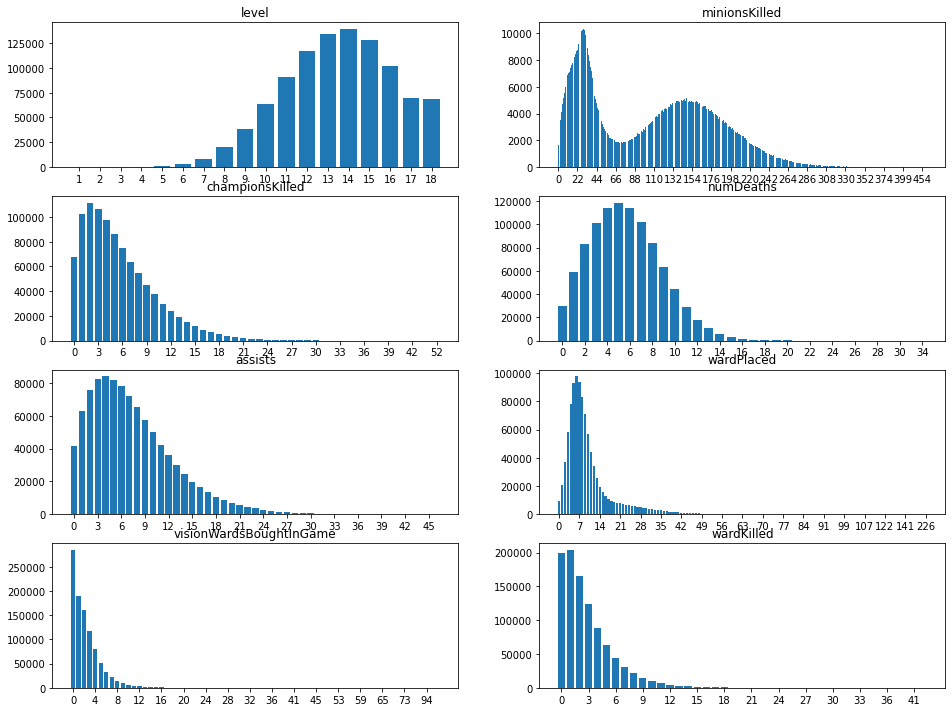

In [15]:
# 이상치 제거 전 그래프

ind = 1
plt.figure(figsize=(16,16))
plt.subplots_adjust(bottom=0.001)

for col in ['level', 'minionsKilled', 'championsKilled', 'numDeaths', 'assists', 'wardPlaced','visionWardsBoughtInGame', 'wardKilled']: 
    plt.subplot(6, 2, ind)
    plt.title(col)
    
    d = data[col]
    
    uniquelist = sorted(list(d.unique()))
    length = len(uniquelist)

    y = [0 for _ in range(length)]
    for i in range(length):
        y[i] = len(d[d == uniquelist[i]])


    x = range(len(d.unique()))
    plt.bar(x, y)
    plt.xticks(x, uniquelist)
    plt.locator_params(axis='x', nbins=20)
    ind += 1

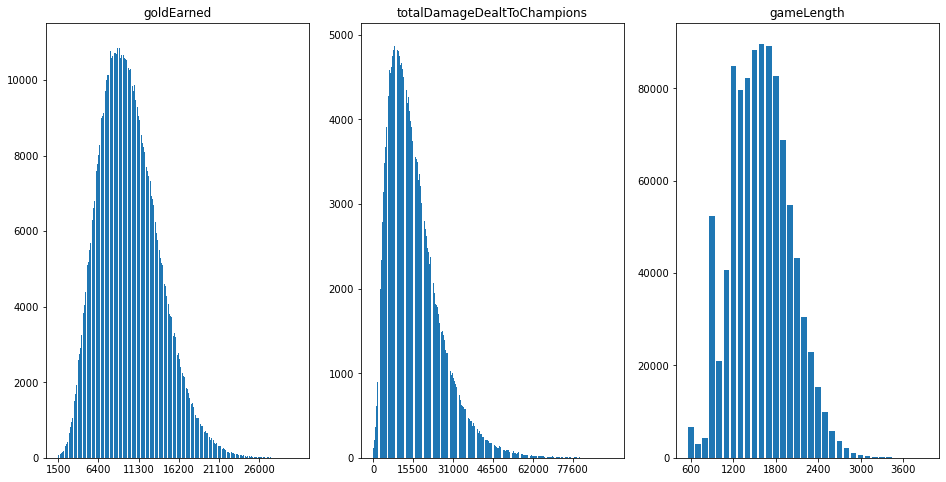

In [16]:
# 이상치 제거 전 그래프
ind = 1
plt.figure(figsize=(16, 8))

for col in ['goldEarned', 'totalDamageDealtToChampions', 'gameLength']:
    plt.subplot(1, 3, ind)
    plt.title(col)

    d = data[col]
    d = round(d//100, 2) * 100

    uniquelist = sorted(list(d.unique()))
    length = len(uniquelist)

    y = [0 for _ in range(length)]
    for i in range(length):
        y[i] = len(d[d == uniquelist[i]])


    x = range(len(d.unique()))
    plt.bar(x, y)
    plt.xticks(x, uniquelist)
    plt.locator_params(axis='x', nbins=6)
    ind += 1

In [17]:
# 위에 그래프들을 통해서 --> 이상치 제거 기준을 세울 수 있다
# level : 하위 0.3퍼 제거
# 'minionsKilled', 'championsKilled', 'numDeaths', 'assists', 'wardPlaced','visionWardsBoughtInGame', 'wardKilled' : 상위 0.3퍼 제거
# 'goldEarned', 'totalDamageDealtToChampions', 'gameLength' : 하위, 상위 0.3퍼 제거

In [18]:
# processed_data : 이상치가 제거된 데이터 

processed_data = data
want_data = ['level', 'minionsKilled', 'championsKilled', 'numDeaths', 'assists', 'wardPlaced', 'visionWardsBoughtInGame', 'wardKilled', 'goldEarned', 'totalDamageDealtToChampions', 'gameLength']
# 하위 0.3퍼, 상위 0.3퍼 데이터를 제거한다
for col in want_data:
    minimum = data[col].quantile(0.003)
    maximum = data[col].quantile(0.997)
    if col == 'level':
        processed_data = processed_data[data[col] > minimum]
    
    elif col in ['minionsKilled', 'championsKilled', 'numDeaths', 'assists', 'wardPlaced','visionWardsBoughtInGame', 'wardKilled']:
        processed_data = processed_data[data[col] < maximum]
    
    else:
         processed_data = processed_data[processed_data[col] < maximum]
         processed_data = processed_data[processed_data[col] > minimum]   

<ipython-input-18-d4ebe737dbb5>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  processed_data = processed_data[data[col] < maximum]
<ipython-input-18-d4ebe737dbb5>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  processed_data = processed_data[data[col] < maximum]
<ipython-input-18-d4ebe737dbb5>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  processed_data = processed_data[data[col] < maximum]
<ipython-input-18-d4ebe737dbb5>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  processed_data = processed_data[data[col] < maximum]
<ipython-input-18-d4ebe737dbb5>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  processed_data = processed_data[data[col] < maximum]
<ipython-input-18-d4ebe737dbb5>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  processed_data = processed_data[data[col] < maximum

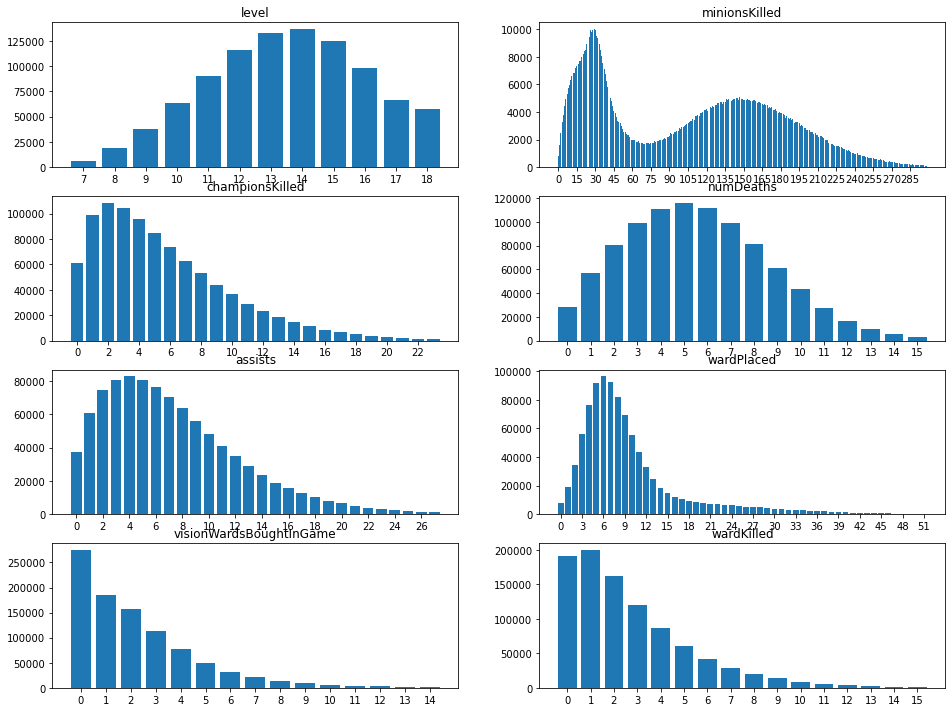

In [19]:
# 이상치 제거 후 그래프

ind = 1
plt.figure(figsize=(16,16))
plt.subplots_adjust(bottom=0.001)

for col in ['level', 'minionsKilled', 'championsKilled', 'numDeaths', 'assists', 'wardPlaced','visionWardsBoughtInGame', 'wardKilled']: 
    plt.subplot(6, 2, ind)
    plt.title(col)
    
    d = processed_data[col]
    
    uniquelist = sorted(list(d.unique()))
    length = len(uniquelist)

    y = [0 for _ in range(length)]
    for i in range(length):
        y[i] = len(d[d == uniquelist[i]])


    x = range(len(d.unique()))
    plt.bar(x, y)
    plt.xticks(x, uniquelist)
    plt.locator_params(axis='x', nbins=20)
    ind += 1

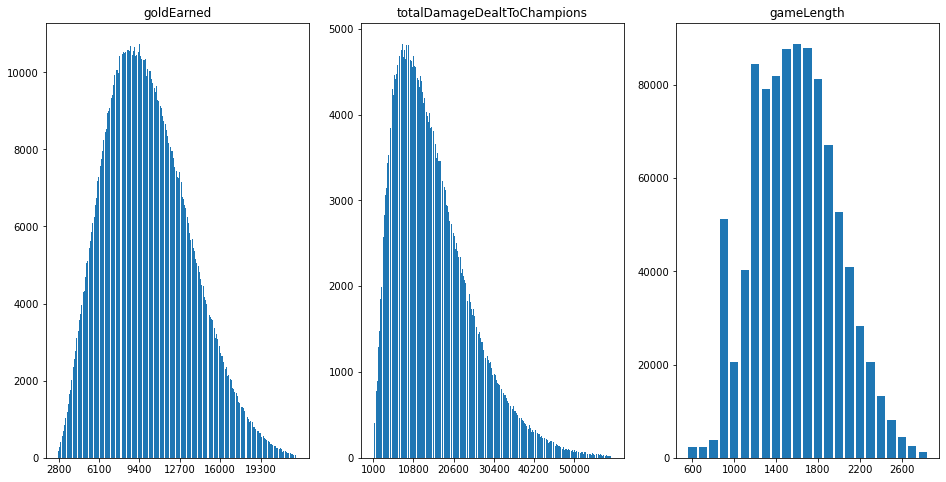

In [20]:
# 이상치 제거 후 그래프

ind = 1
plt.figure(figsize=(16, 8))

for col in ['goldEarned', 'totalDamageDealtToChampions', 'gameLength']:
    plt.subplot(1, 3, ind)
    plt.title(col)

    d = processed_data[col]
    d = round(d//100, 2) * 100

    uniquelist = sorted(list(d.unique()))
    length = len(uniquelist)

    y = [0 for _ in range(length)]
    for i in range(length):
        y[i] = len(d[d == uniquelist[i]])


    x = range(len(d.unique()))
    plt.bar(x, y)
    plt.xticks(x, uniquelist)
    plt.locator_params(axis='x', nbins=6)
    ind += 1

In [21]:
processed_data['gameLength'] /= 60

In [22]:
for it in processed_data.columns[3:len(processed_data.columns)-1]:
    processed_data[it] /= processed_data['gameLength']
processed_data = processed_data.drop(columns='gameLength')

In [23]:
processed_data.head(3)

,tier,division,position,level,minionsKilled,championsKilled,numDeaths,assists,wardPlaced,visionWardsBoughtInGame,wardKilled,goldEarned,totalDamageDealtToChampions
0,P,3,S,0.617284,0.925926,0.246914,0.061728,0.308642,0.308642,0.061728,0.061728,375.493827,345.061728
1,P,4,S,0.493827,0.432099,0.061728,0.185185,0.185185,0.370370,0.185185,0.185185,254.197531,236.234568
2,P,3,M,0.679012,6.172840,0.308642,0.061728,0.308642,0.432099,0.246914,0.308642,417.839506,584.382716


In [24]:
# 확인하고 싶은 아이디 입력
summoner_name = '센센마'

In [25]:
# selenium을 백그라운드로 실행하기 위해 옵션 설정
options = webdriver.ChromeOptions()
options.add_argument('headless')
options.add_argument('window-size=1920x1080')

In [26]:
# selenium으로 실행시킬 url설정
summoner_url = 'https://poro.gg/summoner/kr/' + summoner_name
chrome_driver_path = "C:/Users/HEESU/[opgg데이터분석가]/chromedriver"
driver = webdriver.Chrome(chrome_driver_path)

driver.get(summoner_url)

<ipython-input-26-4db4e85b1dc4>:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chrome_driver_path)


In [27]:
# 솔로랭크의 자료만을 원하므로, 솔로랭크 버튼 클릭
solo_rank_button = driver.find_element_by_css_selector("#vue-profile > div.match-history-container.mt-3 > div:nth-child(1) > div.summoner-box__content > div > div.match-history-filter__queue-types > button:nth-child(2)")
solo_rank_button.click()
time.sleep(2)

<ipython-input-27-0c252052034b>:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  solo_rank_button = driver.find_element_by_css_selector("#vue-profile > div.match-history-container.mt-3 > div:nth-child(1) > div.summoner-box__content > div > div.match-history-filter__queue-types > button:nth-child(2)")


In [28]:
# 컨테이너의 정보들은, start가 3부터 시작해서, 1씩 더해지며 쌓인다.
# 각 컨테이너 마다 (+) 버튼 눌러주는 코드
start = 3
while True:
    try:
        driver.find_element_by_css_selector("#vue-profile > div.match-history-container.mt-3 > div:nth-child(" + str(start) + ") > div > div.match-history__expand-toggle").click()
        time.sleep(2)
        start += 1
    
    except Exception as e:
        pass
        break

<ipython-input-28-f85ecca347a0>:6: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector("#vue-profile > div.match-history-container.mt-3 > div:nth-child(" + str(start) + ") > div > div.match-history__expand-toggle").click()


In [29]:
# 전체 펼친 html
summoner_html = driver.page_source
summoner_soup = BeautifulSoup(summoner_html, 'html.parser')

In [30]:
driver.quit()

In [31]:
# 내 티어 정보
mysolorank_info = list(summoner_soup.select('div.summoner-tier__description'))[0]
mytier = list(mysolorank_info.stripped_strings)[0]
mylst = mytier.split('\n')

tierdict = {'아이언' : 'I', '브론즈' : 'B', '실버' : 'S', '골드' : 'G', '플래티넘' : 'P', 
 '다이아몬드' : 'D', '마스터' : 'M', '그랜드마스터' : 'R', '챌린저' : 'C'}

my_tier = tierdict[mylst[0]]
my_division = mylst[1].lstrip()
print(my_tier, my_division)

P 1


In [32]:
# 불러오는 게임의 수
# games_len = len(summoner_games_html)

summoner_games_html = summoner_soup.select('div.match-history__content')
games_len = 20

In [33]:
# 확인하고 싶은 자료 선정
Damage = []
CS = []
Wardplaced = []
visionWardplaced = []
WardKilled = []
Kill = []
Death = []
Assist = []
Level = []
Gold = []
Gamelength = []
Position = []

In [34]:
# 각각의 정보들을 각 리스트에 담아준다.

for i in range(games_len):
    Level.append(int(list(summoner_games_html[i].select_one('div.champion').stripped_strings)[0]))
    CS.append(int(list(summoner_games_html[i].select_one('div.info').stripped_strings)[3]))
    Kill.append(int(list(summoner_games_html[i].select_one('div.kda').stripped_strings)[0]))
    Death.append(int(list(summoner_games_html[i].select_one('div.kda').stripped_strings)[2]))
    Assist.append(int(list(summoner_games_html[i].select_one('div.kda').stripped_strings)[4]))
    Wardplaced.append(int(list(summoner_games_html[i].select_one(' div.wards.mt-1').stripped_strings)[1]))
    visionWardplaced.append(int(list(summoner_games_html[i].select_one(' div.wards.mt-1').stripped_strings)[0]))
    WardKilled.append(int(list(summoner_games_html[i].select_one(' div.wards.mt-1').stripped_strings)[2]))
    gl = list(summoner_games_html[i].select_one('span.mt-md-1'))[0].split(':')
    Gamelength.append(int(gl[0])*60 + int(gl[1]))

In [35]:
# 각 게임의 '자세히보기' 버튼을 눌러야 나오는 정보들을 담는 코드

summoner_results_html = summoner_soup.select('div.match-history__result')
for i in range(games_len):
    if list(summoner_results_html[i].stripped_strings)[0] == '패배':
        summoner_details_html = summoner_soup.select('div.match-history-detail__content')
        gold_selector = '#vue-profile > div.match-history-container.mt-3 > div:nth-child(' + str(i+3) + ') > div.match-history-detail > div.match-history-detail__content > div > div > div.col-12.col-lg-6.border-e6-left-md > div > div.match-detail-overview__summoners > div.match-detail-overview__summoner.match-detail-overview__summoner--me > div > div.match-detail-overview__summoner__column.stats > div.wards > div:nth-child(2) > span'
        damage_selector = '#vue-profile > div.match-history-container.mt-3 > div:nth-child(' + str(i+3) + ') > div.match-history-detail > div.match-history-detail__content > div > div > div.col-12.col-lg-6.border-e6-left-md > div > div.match-detail-overview__summoners > div.match-detail-overview__summoner.match-detail-overview__summoner--me > div > div.match-detail-overview__summoner__column.stats > div.graph > span'
        position_selector = '#vue-profile > div.match-history-container.mt-3 > div:nth-child(' + str(i+3) + ') > div.match-history-detail > div.match-history-detail__content > div > div > div.col-12.col-lg-6.border-e6-left-md > div > div.match-detail-overview__summoners'
    elif list(summoner_results_html[i].stripped_strings)[0] == '승리':
        summoner_details_html = summoner_soup.select('div.match-history-detail__content')
        gold_selector = '#vue-profile > div.match-history-container.mt-3 > div:nth-child(' + str(i+3) + ') > div.match-history-detail > div.match-history-detail__content > div > div > div:nth-child(1) > div > div.match-detail-overview__summoners > div.match-detail-overview__summoner.match-detail-overview__summoner--me > div > div.match-detail-overview__summoner__column.stats > div.wards > div:nth-child(2) > span'
        damage_selector = '#vue-profile > div.match-history-container.mt-3 > div:nth-child(' + str(i+3) + ') > div.match-history-detail > div.match-history-detail__content > div > div > div:nth-child(1) > div > div.match-detail-overview__summoners > div.match-detail-overview__summoner.match-detail-overview__summoner--me > div > div.match-detail-overview__summoner__column.stats > div.graph > span'
        position_selector = '#vue-profile > div.match-history-container.mt-3 > div:nth-child(' + str(i+3) + ') > div.match-history-detail > div.match-history-detail__content > div > div > div:nth-child(1) > div > div.match-detail-overview__summoners'
    gold = list(summoner_details_html[i].select_one(gold_selector).stripped_strings)[0]
    damage = list(summoner_details_html[i].select_one(damage_selector).stripped_strings)[0]
    
    position = ['T' ,'J', 'M', 'A', 'S']
    for j in range(5):
        if summoner_name in list(summoner_details_html[i].select_one(position_selector).stripped_strings)[17*j:17*(j+1)]:
            Position.append(position[j])
            break
            
    if gold[-1] == '천':
        g = float(gold[:-1])
        g = int(g * 1000)
        Gold.append(g)
        
    elif gold[-1] == '만':
        g = float(gold[:-1])
        g = int(g * 10000)
        Gold.append(g)
        
    if ',' in damage:
        damage = damage.replace(',', '')
    damage = int(damage)
    Damage.append(damage)
    
    time.sleep(1)

In [36]:
# mydf : 내 게임전적 데이터를 저장한 df
# ['Position', 'Kill', 'Death', 'Assist', 'CS', 'Level', 'Damage', 'Wardplaced', 'visionWardplaced', 'WardKilled', 'Gold', 'Gamelength']

mydf = pd.DataFrame({'Position' : Position, 'Kill' : Kill, 'Death' : Death, 'Assist' : Assist,
                    'CS' : CS, 'Level' : Level, 'Damage' : Damage, 'Wardplaced' : Wardplaced,
                   'visionWardplaced' : visionWardplaced, 'WardKilled' : WardKilled,
                     'Gold' : Gold, 'Gamelength' : Gamelength})
mydf

,Position,Kill,Death,Assist,CS,Level,Damage,Wardplaced,visionWardplaced,WardKilled,Gold,Gamelength
0,S,1,5,3,22,7,2715,10,5,3,3700,922
1,S,0,2,23,36,13,4795,33,13,7,7800,1637
2,S,6,6,29,10,16,17272,71,22,9,11000,2031
3,S,1,8,14,34,12,5742,60,17,10,7600,1820
4,S,0,6,20,29,12,5697,41,12,8,7500,1587
5,S,0,7,6,34,9,4673,31,8,3,5100,1360
6,S,0,3,5,21,10,2873,24,8,6,5000,1309
7,S,1,6,11,28,12,5906,51,14,17,7100,1656
8,S,3,4,13,25,9,5941,30,8,5,6300,1248
9,S,2,4,10,37,12,5187,48,18,11,7400,1783


In [37]:
# my_processed_data : 나의 포지션별 분당 데이터

my_processed_data = mydf.groupby('Position').mean()

my_processed_data['Gamelength'] /= 60

for col in my_processed_data.columns:
    my_processed_data[col] /= my_processed_data['Gamelength']

my_processed_data = my_processed_data.drop('Gamelength', axis = 1)
my_processed_data

,Kill,Death,Assist,CS,Level,Damage,Wardplaced,visionWardplaced,WardKilled,Gold
Position,,,,,,,,,,
A,0.174927,0.174927,0.174927,6.647230,0.612245,106.705539,0.262391,0.000000,0.0000,446.064140
S,0.060373,0.204018,0.476736,1.259498,0.420527,251.803893,1.544707,0.489227,0.3664,262.933278


In [38]:
my_processed_data = my_processed_data.reset_index()
my_processed_data.index = ['Me'] * len(my_processed_data)
my_processed_data

,Position,Kill,Death,Assist,CS,Level,Damage,Wardplaced,visionWardplaced,WardKilled,Gold
Me,A,0.174927,0.174927,0.174927,6.647230,0.612245,106.705539,0.262391,0.000000,0.0000,446.064140
Me,S,0.060373,0.204018,0.476736,1.259498,0.420527,251.803893,1.544707,0.489227,0.3664,262.933278


In [107]:
# my_processed_data에 위에서 구한 내 티어와 division을 추가하고, 정렬한다

my_processed_data['tier'] = my_tier
my_processed_data['division'] = my_division
my_processed_data = my_processed_data[['tier', 'division', 'Position', 'Kill', 'Death', 'Assist', 'CS', 'Level', 'Damage', 'Wardplaced', 'visionWardplaced', 'WardKilled', 'Gold']]
my_processed_data

,tier,division,Position,Kill,Death,Assist,CS,Level,Damage,Wardplaced,visionWardplaced,WardKilled,Gold
Me,P,1,A,0.174927,0.174927,0.174927,6.647230,0.612245,106.705539,0.262391,0.000000,0.0000,446.064140
Me,P,1,S,0.060373,0.204018,0.476736,1.259498,0.420527,251.803893,1.544707,0.489227,0.3664,262.933278


In [108]:
# processed_data : 전체 데이터의 분당 데이터
# processed_data column의 이름과 순서를 바꾸어준다.

processed_data = processed_data.rename(columns = {'position' : 'Position',
                                'level' : 'Level',
                                'minionsKilled' : 'CS',
                                'championsKilled' : 'Kill',
                                'numDeaths' : 'Death',
                                'assists' : 'Assist',
                                'wardPlaced' : 'Wardplaced',
                                'visionWardsBoughtInGame' : 'visionWardplaced',
                                'wardKilled' : 'WardKilled',
                                'goldEarned' : 'Gold',
                                'totalDamageDealtToChampions' : 'Damage'})

processed_data = processed_data[['tier', 'division', 'Position', 'Kill', 'Death', 'Assist', 'CS', 'Level', 'Damage', 'Wardplaced', 'visionWardplaced', 'WardKilled', 'Gold']]

processed_data

,tier,division,Position,Kill,Death,Assist,CS,Level,Damage,Wardplaced,visionWardplaced,WardKilled,Gold
0,P,3,S,0.246914,0.061728,0.308642,0.925926,0.617284,345.061728,0.308642,0.061728,0.061728,375.493827
1,P,4,S,0.061728,0.185185,0.185185,0.432099,0.493827,236.234568,0.370370,0.185185,0.185185,254.197531
2,P,3,M,0.308642,0.061728,0.308642,6.172840,0.679012,584.382716,0.432099,0.246914,0.308642,417.839506
3,P,4,T,0.493827,0.123457,0.061728,7.098765,0.679012,676.728395,0.308642,0.061728,0.000000,492.098765
4,P,3,A,0.185185,0.123457,0.555556,6.790123,0.617284,399.074074,0.308642,0.061728,0.123457,466.172840
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,S,1,S,0.025221,0.277427,0.176545,0.731400,0.378310,252.686003,0.731400,0.100883,0.176545,213.139975
999996,G,4,M,0.252207,0.151324,0.075662,6.330391,0.453972,947.818411,0.201765,0.000000,0.025221,461.311475
999997,G,4,J,0.126103,0.126103,0.554855,1.008827,0.428752,529.482976,0.327869,0.075662,0.050441,327.515763
999998,S,1,A,0.151324,0.126103,0.075662,6.557377,0.428752,935.132409,0.277427,0.025221,0.100883,395.308953


In [109]:
# 나와, 모든 유저들의 각 라인별 분당 데이터를 저장한다.

my_Top = my_processed_data[my_processed_data['Position'] == 'T']
my_Jungle = my_processed_data[my_processed_data['Position'] == 'J']
my_Mid = my_processed_data[my_processed_data['Position'] == 'M']
my_Adc = my_processed_data[my_processed_data['Position'] == 'A']
my_Sup = my_processed_data[my_processed_data['Position'] == 'S']

Top = processed_data[processed_data['Position'] == 'T']
Jungle = processed_data[processed_data['Position'] == 'J']
Mid = processed_data[processed_data['Position'] == 'M']
Adc = processed_data[processed_data['Position'] == 'A']
Sup = processed_data[processed_data['Position'] == 'S']

In [110]:
# my_ . _rank : 내 데이터와 전체 데이터를 합치고, rank함수를 통해 내가 상위 몇퍼인지 저장한다.

rank_index = ['Kill', 'Death', 'Assist', 'CS', 'Level', 'Damage', 'Wardplaced', 'visionWardplaced', 'WardKilled', 'Gold']

Top = pd.concat([my_Top, Top])
Jungle = pd.concat([my_Jungle, Jungle])
Mid = pd.concat([my_Mid, Mid])
Adc = pd.concat([my_Adc, Adc])
Sup = pd.concat([my_Sup, Sup])

In [ ]:
# 각 라인별 지표들에 rank를 적용한다. 
# (ascending = False를 쓸 경우 : 지표가 높을수록 좋은 것 (예: 킬, 어시))
# (ascending = True를 쓸 경우 : 지표가 낮을수록 좋은 것 (예: 데스))
# True를 쓰는 경우는, Death밖에 없다.
# 우선 모든 데이터에 ascending = False만 적용하고, Death를 따로 True 해준다

Top_rank = Top[rank_index].rank(ascending = False, pct = True)
Jungle_rank = Jungle[rank_index].rank(ascending = False, pct = True)
Mid_rank = Mid[rank_index].rank(ascending = False, pct = True)
Adc_rank = Adc[rank_index].rank(ascending = False, pct = True)
Sup_rank = Sup[rank_index].rank(ascending = False, pct = True)

Top_rank['Death'] = Top['Death'].rank(ascending = True, pct = True)
Jungle_rank['Death'] = Jungle['Death'].rank(ascending = True, pct = True)
Mid_rank['Death'] = Mid['Death'].rank(ascending = True, pct = True)
Adc_rank['Death'] = Adc['Death'].rank(ascending = True, pct = True)
Sup_rank['Death'] = Sup['Death'].rank(ascending = True, pct = True)

In [ ]:
# 각 라인 데이터에서 내꺼만 뽑아온다

my_Top_rank = Top_rank[Top_rank.index == 'Me']
my_Jungle_rank = Jungle_rank[Jungle.index == 'Me']
my_Mid_rank = Mid_rank[Mid_rank.index == 'Me']
my_Adc_rank = Adc_rank[Adc_rank.index == 'Me']
my_Sup_rank = Sup_rank[Sup_rank.index == 'Me']

In [ ]:
# 내가 상위 몇 퍼센트인지 나타낸 최종 데이터

my_Top_rank = round(my_Top_rank*100)
my_Jungle_rank = round(my_Jungle_rank*100)
my_Mid_rank = round(my_Mid_rank*100)
my_Adc_rank = round(my_Adc_rank*100)
my_Sup_rank = round(my_Sup_rank*100)

In [ ]:
# 나의 서폿이 상위 몇퍼인지 나온다

my_Top

ValueError: Unknown format code 'd' for object of type 'float'

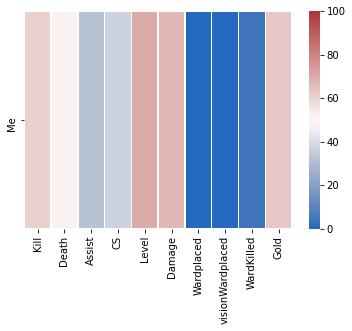

In [94]:
sns.heatmap(my_Sup_rank, vmin = 0, vmax = 100, annot=True, linewidths = 0.5,  fmt='d', cmap = 'vlag', center = 50)